## Predicting Wine Quality : Exploring Chemical Properties for Machine learning Modeling and Parameter Fine-Tuning

In [9]:
import warnings
warnings.filterwarnings('ignore')
import joblib
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
df=pd.read_csv('winequality-red.csv')

In [ ]:
df

## Data preprocessing:

In [ ]:
df['quality'].unique()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.shape

In [2]:
df.describe()

NameError: name 'df' is not defined

In [3]:
# checking null values:

In [4]:
df.isnull().sum()

NameError: name 'df' is not defined

In [5]:
# checjing duplicate values()

In [6]:
df.duplicated().sum()

NameError: name 'df' is not defined

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df = resample(df, replace=True, n_samples=12500, random_state=42)

In [17]:
labels=['quality_level_30%','quality_level_40%','quality_level_50%','quality_level_60%','quality_level_70%','quality_level_80%']

## Exploratory data analysis:

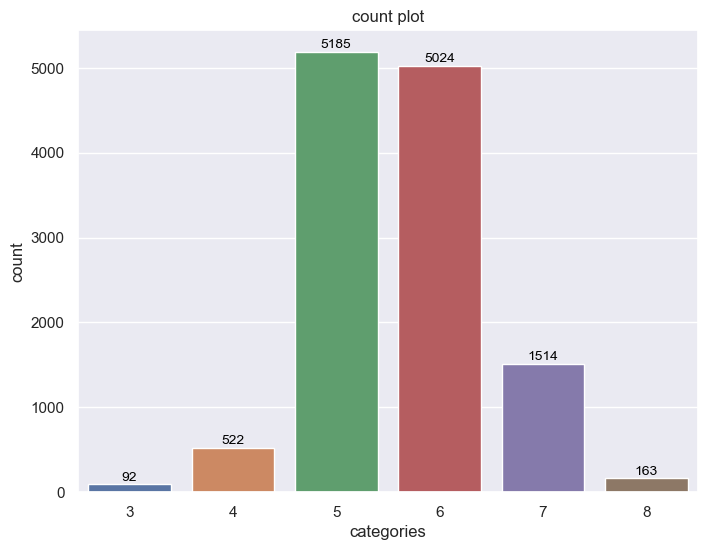

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax=sns.countplot(x='quality',data=df)
plt.title('count plot')
plt.xlabel('categories')
plt.ylabel('count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [ ]:
# X and Y variable declaration:

In [19]:
x=df.iloc[:,0:11]

In [20]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1322,9.1,0.340,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4
1011,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4
1526,6.8,0.470,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6
1329,7.4,0.600,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8
1285,11.3,0.370,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5
...,...,...,...,...,...,...,...,...,...,...,...
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
1225,9.2,0.460,0.23,2.6,0.091,18.0,77.0,0.99922,3.15,0.51,9.4


In [21]:
scaler=StandardScaler()

In [22]:
x_scaled =scaler.fit_transform(x)

In [23]:
y=df.iloc[:,-1]

In [24]:
y

1322    5
1011    6
1526    6
1329    6
1285    5
       ..
1570    6
1478    3
354     6
1225    5
1172    6
Name: quality, Length: 12500, dtype: int64

In [25]:
# train , test and split of data:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [26]:
x_train.shape

(10000, 11)

In [27]:
x_test.shape

(2500, 11)

In [28]:
y_train.shape

(10000,)

In [29]:
y_test.shape

(2500,)

## Applying SMOTE:

In [30]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [31]:
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [32]:
print("Original training set shape:", x_train.shape, y_train.shape)
print("Resampled training set shape:", x_resampled.shape, y_resampled.shape)

Original training set shape: (10000, 11) (10000,)
Resampled training set shape: (24828, 11) (24828,)


In [33]:
df_resampled = pd.DataFrame(x_resampled, columns=df.columns[:-1])
df_resampled['target'] = y_resampled

# Count the occurrences of each class
class_counts = df_resampled['target'].value_counts()
print("Class distribution after applying SMOTE:\n", class_counts)

Class distribution after applying SMOTE:
 8    4138
7    4138
6    4138
5    4138
4    4138
3    4138
Name: target, dtype: int64


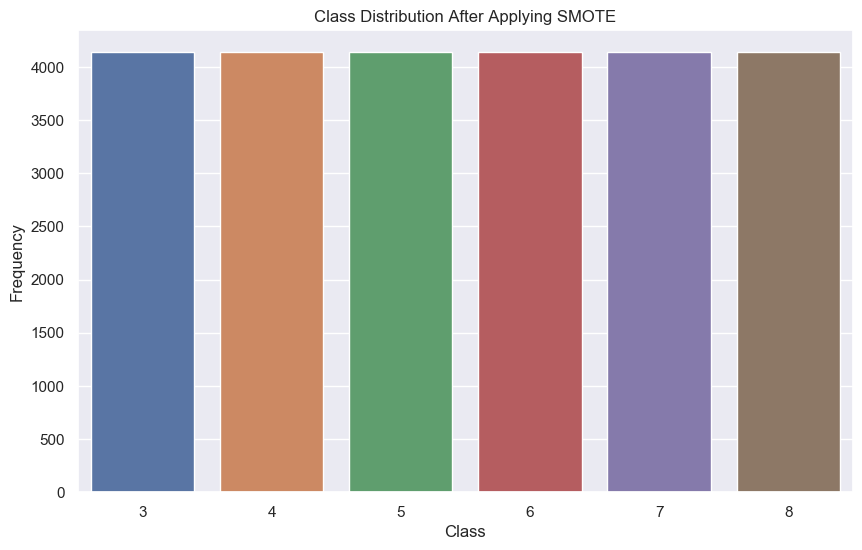

In [36]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution After Applying SMOTE')
plt.show()


In [37]:
labels

['quality_level_30%',
 'quality_level_40%',
 'quality_level_50%',
 'quality_level_60%',
 'quality_level_70%',
 'quality_level_80%']

In [40]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [41]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Model loaded successfully.
GBM_model Accuracy    : 69.76
GBM_model Precision   : 72.40255572225041
GBM_model Recall      : 52.770023699860424
GBM_model FSCORE      : 58.0408232440481

 GBM_model classification report
                    precision    recall  f1-score   support

quality_level_30%       0.32      0.55      0.40        22
quality_level_40%       0.34      0.83      0.49       104
quality_level_50%       0.86      0.69      0.77      1047
quality_level_60%       0.75      0.66      0.70       999
quality_level_70%       0.59      0.80      0.68       295
quality_level_80%       0.31      0.82      0.45        33

         accuracy                           0.70      2500
        macro avg       0.53      0.72      0.58      2500
     weighted avg       0.75      0.70      0.71      2500



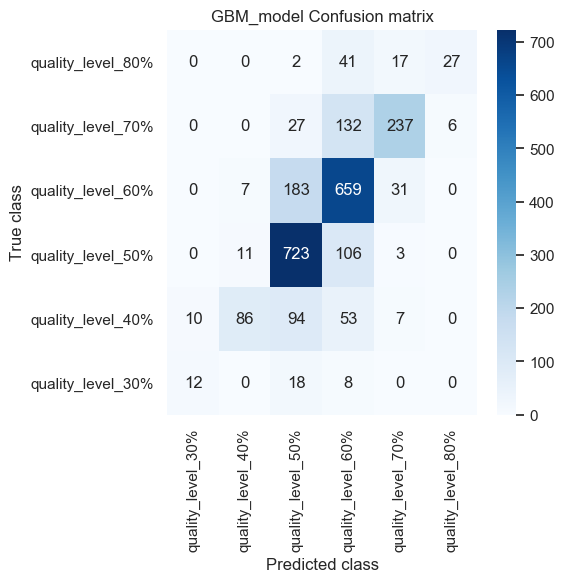

In [42]:
# gradient boost classifier:
if os.path.exists('GBM_model.pkl'):
    # Load the trained model from the file
    gbm = joblib.load('GBM_model.pkl')
    print("Model loaded successfully.")
    predict = gbm.predict(x_test)
    calculateMetrics("GBM_model",predict, y_test)
else:
    gbm = GradientBoostingClassifier()
    gbm.fit(x_resampled, y_resampled)
    # Save the trained model to a file
    joblib.dump(gbm, 'GBM_model.pkl') 
    print("Model saved successfully.")
    predict = gbm.predict(x_test)
    calculateMetrics("GBM_model", predict, y_test)

Model saved successfully.
MLP_model Accuracy    : 99.52
MLP_model Precision   : 99.80132950524546
MLP_model Recall      : 99.80838605904961
MLP_model FSCORE      : 99.80435000884536

 MLP_model classification report
                    precision    recall  f1-score   support

quality_level_30%       1.00      1.00      1.00        22
quality_level_40%       1.00      1.00      1.00       104
quality_level_50%       0.99      1.00      0.99      1047
quality_level_60%       1.00      0.99      0.99       999
quality_level_70%       1.00      1.00      1.00       295
quality_level_80%       1.00      1.00      1.00        33

         accuracy                           1.00      2500
        macro avg       1.00      1.00      1.00      2500
     weighted avg       1.00      1.00      1.00      2500



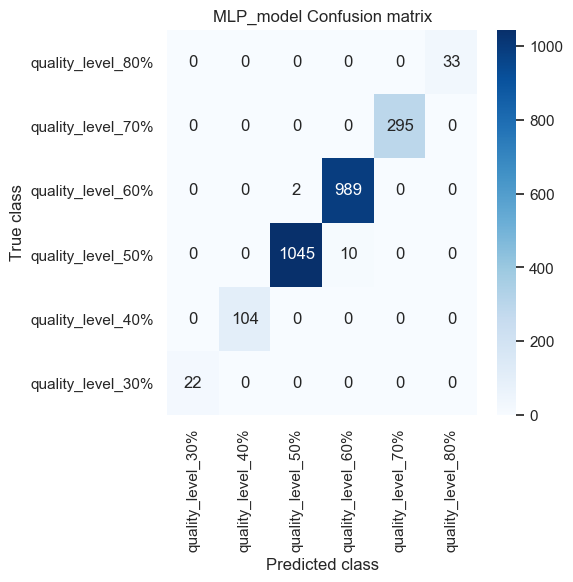

In [43]:
# multi layer perception classifier:
if os.path.exists('MLP_model.pkl'):
    # Load the trained model from the file
    mlp= joblib.load('MLP_model.pkl')
    print("Model loaded successfully.")
    predict = mlp.predict(x_test)
    calculateMetrics("MLP_model", predict, y_test)
else:
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100))
    mlp.fit(x_resampled, y_resampled)
    # Save the trained model to a file
    joblib.dump(mlp, 'MLP_model.pkl') 
    print("Model saved successfully.")
    predict = mlp.predict(x_test)
    calculateMetrics("MLP_model", predict, y_test)

In [44]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Gradient Boost Classifier", "Multi Layer perception"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Gradient Boost Classifier,72.402556,52.770024,58.040823,69.76
1,Multi Layer perception,99.801330,99.808386,99.804350,99.52


In [45]:
test = pd.read_csv('test.csv')

In [46]:
test = test.drop('quality',axis=1)

In [47]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1
1,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7
2,12.0,0.45,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3
3,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3
4,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3


In [48]:
labels

['quality_level_30%',
 'quality_level_40%',
 'quality_level_50%',
 'quality_level_60%',
 'quality_level_70%',
 'quality_level_80%']

In [50]:
# Make predictions on the selected test data
predict = mlp.predict(test)
# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:************************************************** quality_level_30% ".format(i))
    elif p==1:
        print(test.iloc[i])
        print("Row {}:**************************************************   quality_level_40%'".format(i))
    elif p==2:
        print(test.iloc[i])
        print("Row {}:************************************************** quality_level_50".format(i))
    elif p==3:
        print(test.iloc[i])
        print("Row {}:************************************************** quality_level_60".format(i))
    elif p==4:
        print(test.iloc[i])
        print("Row {}:************************************************** quality_level_70".format(i))
    elif p==5:
        print(test.iloc[i])
        print("Row {}:************************************************** quality_level_80".format(i))

fixed acidity             9.2000
volatile acidity          0.7550
citric acid               0.1800
residual sugar            2.2000
chlorides                 0.1480
free sulfur dioxide      10.0000
total sulfur dioxide    103.0000
density                   0.9969
pH                        2.8700
sulphates                 1.3600
alcohol                  10.2000
Name: 8, dtype: float64
Row 8:************************************************** quality_level_80
fixed acidity            9.00000
volatile acidity         0.46000
citric acid              0.31000
residual sugar           2.80000
chlorides                0.09300
free sulfur dioxide     19.00000
total sulfur dioxide    98.00000
density                  0.99815
pH                       3.32000
sulphates                0.63000
alcohol                  9.50000
Name: 11, dtype: float64
Row 11:************************************************** quality_level_80
fixed acidity             7.9000
volatile acidity          0.5000
citric aci

In [51]:
test['predict']=predict

In [52]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
0,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,7
1,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,7
2,12.0,0.45,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,7
3,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,7
4,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,7
96,9.0,0.46,0.23,2.8,0.092,28.0,104.0,0.99830,3.10,0.56,9.2,5
97,7.6,0.48,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3,7
98,6.2,0.45,0.20,1.6,0.069,3.0,15.0,0.99580,3.41,0.56,9.2,7


In [54]:
mapping = {3: 'quality_level_30', 4: 'quality_level_40', 5: 'quality_level_50', 6: 'quality_level_60', 7: 'quality_level_70',8:'quality_level_80'}

In [55]:
test['predict'] = test['predict'].map(mapping)

In [56]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
0,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,quality_level_70
1,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,quality_level_70
2,12.0,0.45,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,quality_level_70
3,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,quality_level_70
4,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,quality_level_70
...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,quality_level_70
96,9.0,0.46,0.23,2.8,0.092,28.0,104.0,0.99830,3.10,0.56,9.2,quality_level_50
97,7.6,0.48,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3,quality_level_70
98,6.2,0.45,0.20,1.6,0.069,3.0,15.0,0.99580,3.41,0.56,9.2,quality_level_70
